In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as npimg
import os

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense

import cv2
import pandas as pd
import random
import ntpath

## Sklearn
from sklearn.utils import shuffle

In [ ]:
!unzip IMG.zip -d /content/IMG

Archive:  IMG.zip
  inflating: /content/IMG/IMG/center_2022_05_25_15_20_25_113.jpg  
  inflating: /content/IMG/IMG/center_2022_05_25_15_20_25_178.jpg  
  inflating: /content/IMG/IMG/center_2022_05_25_15_20_25_249.jpg  
  inflating: /content/IMG/IMG/center_2022_05_25_15_20_25_319.jpg  
  inflating: /content/IMG/IMG/center_2022_05_25_15_20_25_388.jpg  
  inflating: /content/IMG/IMG/center_2022_05_25_15_20_25_455.jpg  
  inflating: /content/IMG/IMG/center_2022_05_25_15_20_25_526.jpg  
  inflating: /content/IMG/IMG/center_2022_05_25_15_20_25_597.jpg  
  inflating: /content/IMG/IMG/center_2022_05_25_15_20_25_665.jpg  
  inflating: /content/IMG/IMG/center_2022_05_25_15_20_25_735.jpg  
  inflating: /content/IMG/IMG/center_2022_05_25_15_20_25_805.jpg  
  inflating: /content/IMG/IMG/center_2022_05_25_15_20_25_872.jpg  
  inflating: /content/IMG/IMG/center_2022_05_25_15_20_25_943.jpg  
  inflating: /content/IMG/IMG/center_2022_05_25_15_20_26_013.jpg  
  inflating: /content/IMG/IMG/center_2022_05

In [ ]:
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
dataset = pd.read_csv('driving_log.csv', names = columns)
dataset.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\athar\Documents\IMG\center_2022_05_25...,C:\Users\athar\Documents\IMG\left_2022_05_25_1...,C:\Users\athar\Documents\IMG\right_2022_05_25_...,0.0,0.0,0,0.000017
1,C:\Users\athar\Documents\IMG\center_2022_05_25...,C:\Users\athar\Documents\IMG\left_2022_05_25_1...,C:\Users\athar\Documents\IMG\right_2022_05_25_...,0.0,0.0,0,0.000003
2,C:\Users\athar\Documents\IMG\center_2022_05_25...,C:\Users\athar\Documents\IMG\left_2022_05_25_1...,C:\Users\athar\Documents\IMG\right_2022_05_25_...,0.0,0.0,0,0.000014
3,C:\Users\athar\Documents\IMG\center_2022_05_25...,C:\Users\athar\Documents\IMG\left_2022_05_25_1...,C:\Users\athar\Documents\IMG\right_2022_05_25_...,0.0,0.0,0,0.000019
4,C:\Users\athar\Documents\IMG\center_2022_05_25...,C:\Users\athar\Documents\IMG\left_2022_05_25_1...,C:\Users\athar\Documents\IMG\right_2022_05_25_...,0.0,0.0,0,0.000009


Modifying all path variables

In [ ]:
center_path = ["/content/IMG/IMG/" + path[29:] for path in dataset["center"]]
right_path = ["/content/IMG/IMG/" + path[29:] for path in dataset["right"]]
left_path = ["/content/IMG/IMG/" + path[29:] for path in dataset["left"]]

In [ ]:
center_path = pd.DataFrame(center_path, columns=["center"])
right_path = pd.DataFrame(right_path, columns=["right"])
left_path = pd.DataFrame(left_path, columns=["left"])

In [ ]:
dataset = pd.concat([center_path, left_path, right_path, dataset[["steering", "throttle", "reverse", "speed"]]], axis = 1)
dataset.head()

,center,left,right,steering,throttle,reverse,speed
0,/content/IMG/IMG/center_2022_05_25_15_20_25_11...,/content/IMG/IMG/left_2022_05_25_15_20_25_113.jpg,/content/IMG/IMG/right_2022_05_25_15_20_25_113...,0.0,0.0,0,0.000017
1,/content/IMG/IMG/center_2022_05_25_15_20_25_17...,/content/IMG/IMG/left_2022_05_25_15_20_25_178.jpg,/content/IMG/IMG/right_2022_05_25_15_20_25_178...,0.0,0.0,0,0.000003
2,/content/IMG/IMG/center_2022_05_25_15_20_25_24...,/content/IMG/IMG/left_2022_05_25_15_20_25_249.jpg,/content/IMG/IMG/right_2022_05_25_15_20_25_249...,0.0,0.0,0,0.000014
3,/content/IMG/IMG/center_2022_05_25_15_20_25_31...,/content/IMG/IMG/left_2022_05_25_15_20_25_319.jpg,/content/IMG/IMG/right_2022_05_25_15_20_25_319...,0.0,0.0,0,0.000019
4,/content/IMG/IMG/center_2022_05_25_15_20_25_38...,/content/IMG/IMG/left_2022_05_25_15_20_25_388.jpg,/content/IMG/IMG/right_2022_05_25_15_20_25_388...,0.0,0.0,0,0.000009


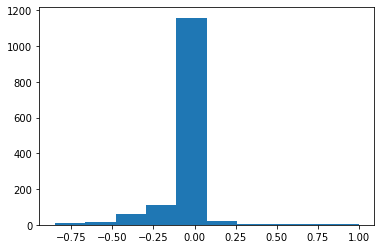

In [ ]:
plt.hist(dataset["steering"])
plt.show()

Huge spike at steering=0 i.e moving in a straight line. This dataset is skewed.

This can be fixed by  ignoring half the datapoints where steering = 0

In [ ]:
count = 0
dataset["ignore_data"] = [False for i in range(len(dataset))]
for i in range(len(dataset)):
    if dataset["steering"][i] == 0:
        if count % 2 == 0:
            dataset["ignore_data"][i] = True
        count += 1
dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,center,left,right,steering,throttle,reverse,speed,ignore_data
0,/content/IMG/IMG/center_2022_05_25_15_20_25_11...,/content/IMG/IMG/left_2022_05_25_15_20_25_113.jpg,/content/IMG/IMG/right_2022_05_25_15_20_25_113...,0.0,0.0,0,0.000017,True
1,/content/IMG/IMG/center_2022_05_25_15_20_25_17...,/content/IMG/IMG/left_2022_05_25_15_20_25_178.jpg,/content/IMG/IMG/right_2022_05_25_15_20_25_178...,0.0,0.0,0,0.000003,False
2,/content/IMG/IMG/center_2022_05_25_15_20_25_24...,/content/IMG/IMG/left_2022_05_25_15_20_25_249.jpg,/content/IMG/IMG/right_2022_05_25_15_20_25_249...,0.0,0.0,0,0.000014,True
3,/content/IMG/IMG/center_2022_05_25_15_20_25_31...,/content/IMG/IMG/left_2022_05_25_15_20_25_319.jpg,/content/IMG/IMG/right_2022_05_25_15_20_25_319...,0.0,0.0,0,0.000019,False
4,/content/IMG/IMG/center_2022_05_25_15_20_25_38...,/content/IMG/IMG/left_2022_05_25_15_20_25_388.jpg,/content/IMG/IMG/right_2022_05_25_15_20_25_388...,0.0,0.0,0,0.000009,True


In [ ]:
dataset = dataset[dataset["ignore_data"] == False]

## Image Processing

In [ ]:
import cv2
# Takes image path as parameter
# Returns processed image
def image_processing(image):
    image = npimg.imread(image)
    # crop the image to ignore useless features like the sky
    image_cropped = image[65:,:,:] 
    gray = cv2.cvtColor(image_cropped, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (3,3), 0)
    cannyImage = cv2.Canny(blur, 120, 300)
    img = cv2.resize(cannyImage, (100, 100))
    img = img / 255
    return img

In [ ]:
image = npimg.imread(dataset["center"][75])
processed_image = image_processing(dataset["center"][75])

Comparison between original image and processed image

Text(0.5, 1.0, 'Processed Image')

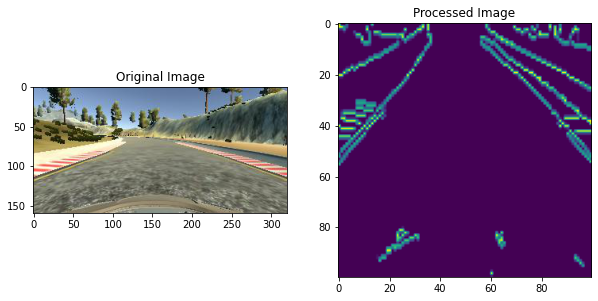

In [ ]:
f, axarr = plt.subplots(1,2, figsize=(10, 20))
axarr[0].imshow(image)
axarr[0].set_title("Original Image")
axarr[1].imshow(processed_image)
axarr[1].set_title("Processed Image")

## Splitting dataset into Training and test sets

In [ ]:
from sklearn.model_selection import train_test_split
images = dataset["center"]
steering = dataset["steering"]

X_train, X_test, y_train, y_test = train_test_split(images, steering, test_size = 0.2, random_state = 10)

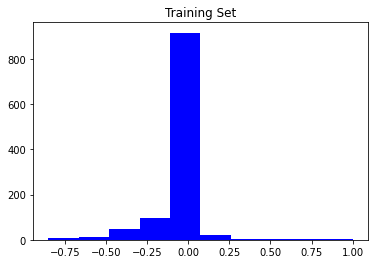

In [ ]:
plt.hist(y_train, color="blue")
plt.title("Training Set")
plt.show()

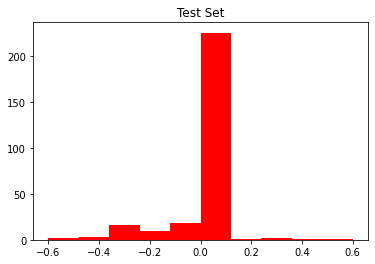

In [ ]:
plt.hist(y_test, color="red")
plt.title("Test Set")
plt.show()


Convert all images to numpy arrays

In [ ]:
# Don't Execute this if u don't want image processing
X_train = np.array(list(map(image_processing, X_train)))
X_test = np.array(list(map(image_processing, X_test)))

In [ ]:
for i in range(len(X_train)):
    X_train[i] = np.reshape(X_train[i], (1, 100, 100))

In [ ]:
for i in range(len(X_test)):
    X_test[i] = np.reshape(X_test[i], (1, 100, 100))

Trying VGG-16

In [ ]:
def build_model():
    model = Sequential()
    model.add(Conv2D(input_shape=(100,100,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(100, activation='elu'))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation='elu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss='mse', optimizer="sgd", metrics=['accuracy'])
    return model

model = build_model()
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 100, 100, 64)      640       
                                                                 
 conv2d_40 (Conv2D)          (None, 100, 100, 64)      36928     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 50, 50, 128)       73856     
                                                                 
 conv2d_42 (Conv2D)          (None, 50, 50, 128)       147584    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 25, 25, 128)      0         
 g2D)                                                 

Epoch 1/100
18/18 [==============================] - 7s 345ms/step - loss: 0.4031 - accuracy: 0.2269 - val_loss: 0.3510 - val_accuracy: 0.0000e+00
Epoch 2/100
18/18 [==============================] - 4s 205ms/step - loss: 0.3483 - accuracy: 0.3139 - val_loss: 0.2993 - val_accuracy: 0.0000e+00
Epoch 3/100
18/18 [==============================] - 4s 205ms/step - loss: 0.3036 - accuracy: 0.4188 - val_loss: 0.2557 - val_accuracy: 0.7921
Epoch 4/100
18/18 [==============================] - 4s 206ms/step - loss: 0.2678 - accuracy: 0.5013 - val_loss: 0.2186 - val_accuracy: 0.7921
Epoch 5/100
18/18 [==============================] - 4s 207ms/step - loss: 0.2327 - accuracy: 0.5946 - val_loss: 0.1873 - val_accuracy: 0.7921
Epoch 6/100
18/18 [==============================] - 4s 208ms/step - loss: 0.2040 - accuracy: 0.6484 - val_loss: 0.1619 - val_accuracy: 0.7921
Epoch 7/100
18/18 [==============================] - 4s 209ms/step - loss: 0.1845 - accuracy: 0.6960 - val_loss: 0.1413 - val_accuracy

Text(0.5, 0, 'Epoch')

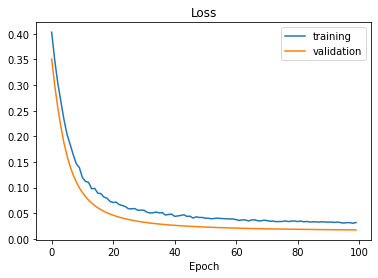

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64,  validation_data=(X_test, y_test))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

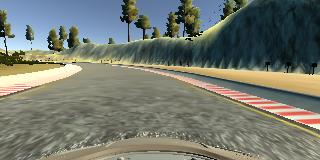

In [ ]:
from google.colab.patches import cv2_imshow
test = cv2.imread("test3.jpg")
cv2_imshow(test)

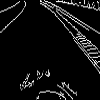

In [ ]:

image_cropped = test[65:,:,:] 
gray = cv2.cvtColor(image_cropped, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
cannyImage = cv2.Canny(blur, 120, 300)
img = cv2.resize(cannyImage, (100, 100))
cv2_imshow(img)

In [ ]:
img = np.array(img)
img = np.reshape(img, (1, 100, 100))

In [ ]:
model.predict(img)

array([[0.01924885]], dtype=float32)